<a href="https://colab.research.google.com/github/silvia-jesus/CAR_Labrea/blob/main/CAR_RL_Labrea_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs')

from pathlib import Path
Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
import io
import requests

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


pd.options.display.float_format = '{:.2f}'.format

In [ ]:
imoveis = gpd.read_file('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/AREA_IMOVEL/AREA_IMOVEL_UNZIPPED/IM_1302405_102033.shp')

In [ ]:
imoveis.head()

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,geometry
0,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,LÃ¡brea,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-734906.403 2562229.825, -734869.871..."
1,AM-1302405-AA1907779A0F41A9A6B2223027F7A829,100.22,AM,LÃ¡brea,1.00,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-736595.743 2557908.955, -736330.354..."
2,AM-1302405-D7B80B40290D4971BE914DC9A193EAD5,4924.32,AM,LÃ¡brea,51.31,IRU,AT,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-710176.765 2573995.713, -709583.330..."
3,AM-1302405-450B753B24744318B6EA3DDC40A32C5D,4175.21,AM,LÃ¡brea,41.75,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-720061.679 2577243.663, -710778.119..."
4,AM-1302405-6AA5D37ECEC74951A4167DFA842906A3,538.79,AM,LÃ¡brea,5.39,IRU,AT,Aguardando anÃ¡lise,"POLYGON ((-724607.248 2561645.336, -724373.290..."


In [ ]:
imoveis['area_calc_IM_ha'] = imoveis['geometry'].area*0.0001

In [ ]:
f=['AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F', 'AM-1302405-8C68014707E543FA8B54A7C8488CEB56', 'AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5'] #código dos imóveis que se sobrepõem a mais de 90% das UCs no código 12


imoveis = imoveis[~imoveis['COD_IMOVEL'].isin(f)]


In [ ]:
crs = imoveis.crs
crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: D_Unknown_based_on_Australian_Natl_S_Amer_1969_ellipsoid
- Ellipsoid: Australian_Natl_S_Amer_1969
- Prime Meridian: Greenwich

In [ ]:
cd_mun = '1302405'

In [ ]:
url = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip'
response = requests.get(url)
content = response.content

muni_br = gpd.read_file(io.BytesIO(content), sep=',', compression='gzip', index_col=0, quotechar='"')

In [ ]:
muni = muni_br[muni_br['CD_MUN']==cd_mun]
muni = muni.to_crs(crs)
muni

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
108,1302405,Lábrea,AM,68262.68,"POLYGON ((-555625.691 2864929.710, -554633.619..."


In [ ]:
ti = gpd.read_file('/content/drive/MyDrive/CAR_RL_Labrea/DADOS/TERRAS_INDIGENAS/ti_sirgas2000.shp')
ti = ti.to_crs(crs)
ti['area_calc_ti_ha']=ti['geometry'].area/ 10**4
ti.head()

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,TIPO,geometry,area_calc_ti_ha
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.94,Declarada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,30202001857.00,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-ASL,TI,"POLYGON ((-775417.274 3360446.252, -774401.074...",18149.62
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.03,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,"POLYGON ((-686504.596 2781468.189, -686504.475...",40622.14
2,57,601,Aconã,Tingui-Botó,Traipu,AL,267.79,Encaminhada RI,Reserva Indígena,NaN,COORDENACAO REGIONAL NORDESTE I,Não,30202001969.00,COORDENACAO REGIONAL NORDESTE I,CR-NE-I,TI,"POLYGON ((2460805.549 2352262.642, 2460976.278...",267.66
3,62,401,Água Preta/Inari,Apurinã,Pauini,AM,139763.67,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,"POLYGON ((-796451.162 2828117.860, -796398.327...",139746.28
4,1269,10901,Deni,Dení,"Tapauá,Lábrea,Itamarati,Pauini",AM,1531303.50,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,"POLYGON ((-861911.352 2968467.321, -861856.607...",1528224.89


In [ ]:
print(muni.crs)
print(ti.crs)
print(imoveis.crs)

PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unknown_based_on_Australian_Natl_S_Amer_1969_ellipsoid",SPHEROID["Australian_Natl_S_Amer_1969",6378160,298.25]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-32],PARAMETER["longitude_of_center",-60],PARAMETER["standard_parallel_1",-5],PARAMETER["standard_parallel_2",-42],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unknown_based_on_Australian_Natl_S_Amer_1969_ellipsoid",SPHEROID["Australian_Natl_S_Amer_1969",6378160,298.25]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-32],PARAMETER["longitude_of_center",-60],PARAMETER["standard_parallel_1",-5],PARAMETER["standard_parallel_2",-42],PARAMETER["false_easting",0],PARAMETER["false_northing"

<Axes: >

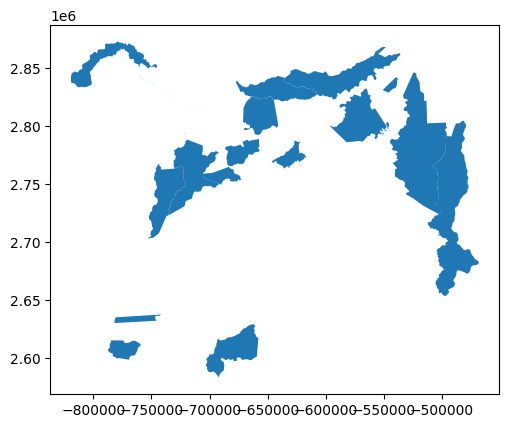

In [ ]:
ti_muni = ti.overlay(muni, how='intersection')
ti_muni.plot()

In [ ]:
ti_muni

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,TIPO,area_calc_ti_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2,201,Acimã,Apurinã,Lábrea,AM,40686.03,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,40622.14,1302405,Lábrea,AM,68262.68,"POLYGON ((-686504.475 2781468.357, -686402.904..."
1,62,401,Água Preta/Inari,Apurinã,Pauini,AM,139763.67,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,139746.28,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-804712.352 2833962.415, -8047..."
2,1269,10901,Deni,Dení,"Tapauá,Lábrea,Itamarati,Pauini",AM,1531303.50,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,1528224.89,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-745543.732 2850380.638, -7456..."
3,17,1301,Alto Sepatini,Apurinã,Lábrea,AM,26095.70,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,26078.61,1302405,Lábrea,AM,68262.68,"POLYGON ((-678802.994 2759712.919, -678754.792..."
4,12,52601,Apurinã do Igarapé Mucuim,Apurinã,Lábrea,AM,73350.61,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,73208.87,1302405,Lábrea,AM,68262.68,"POLYGON ((-671110.320 2803624.790, -671103.487..."
5,24,2901,Apurinã Km 124 BR-317,Apurinã,"Boca do Acre,Lábrea",AM,42197.61,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,42288.84,1302405,Lábrea,AM,68262.68,"POLYGON ((-784782.337 2615380.402, -784684.390..."
6,1212,5402,Banawá,Banawa,"Tapauá,Canutama,Lábrea",AM,192659.67,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,192599.19,1302405,Lábrea,AM,68262.68,"POLYGON ((-548459.603 2867673.436, -549289.747..."
7,1310,15201,Hi Merimã,Himarimã,"Tapauá,Lábrea",AM,677840.32,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,676826.68,1302405,Lábrea,AM,68262.68,"POLYGON ((-636073.354 2841329.154, -636073.093..."
8,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-481139.932 2804193.547, -481137.931..."
9,1347,19001,Jarawara/Jamamadi/Kanamati,"Yaminawa,Jamamadí,Kanamarí","Tapauá,Lábrea",AM,390233.05,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,388960.68,1302405,Lábrea,AM,68262.68,"POLYGON ((-554909.220 2863068.292, -554494.117..."


In [ ]:
imoveis_tis = imoveis.overlay(ti_muni, how='intersection')

<Axes: >

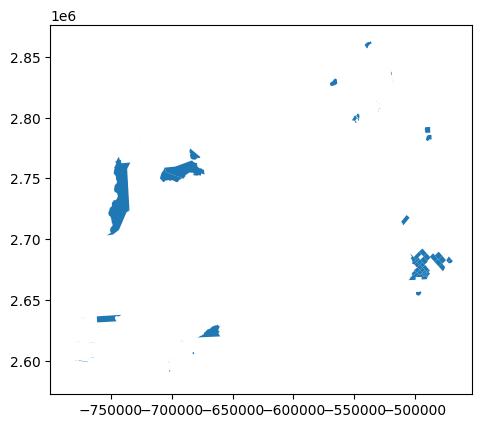

In [ ]:
imoveis_tis.plot()

In [ ]:
imoveis_tis['area_intersec_ha']=imoveis_tis['geometry'].area *0.0001
imoveis_tis['perc_intersec_imovel']=imoveis_tis['area_intersec_ha']/imoveis_tis['area_calc_IM_ha']*100
imoveis_tis['perc_intersec_ti']=imoveis_tis['area_intersec_ha']/imoveis_tis['area_calc_ti_ha']*100

In [ ]:
sort_imoveis = imoveis_tis.sort_values(by='perc_intersec_imovel', ascending=False)
sort_imoveis

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,TIPO,area_calc_ti_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_intersec_ha,perc_intersec_imovel,perc_intersec_ti
50,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,973.24,AM,LÃ¡brea,9.73,IRU,AT,Em anÃ¡lise,973.31,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-491897.448 2679059.441, -491563.879...",973.31,100.00,0.16
55,AM-1302405-B15BDE3D05B8436A8A3AABC846A11FDF,892.85,AM,LÃ¡brea,8.93,IRU,AT,Em anÃ¡lise,892.92,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-491773.632 2674362.978, -493900.752...",892.92,100.00,0.15
46,AM-1302405-42BEA2BC1C324CE49778A37B0C7BE8BE,3.40,AM,LÃ¡brea,0.03,IRU,SU,Aguardando analise,3.40,1224,6401,Boca do Acre,Apurinã,"Boca do Acre,Lábrea",AM,26240.42,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,26591.26,1302405,Lábrea,AM,68262.68,"POLYGON ((-773636.331 2634649.253, -773602.425...",3.40,100.00,0.01
59,AM-1302405-F4ECC02FD7B7436C87034545C2D84083,1376.70,AM,LÃ¡brea,13.77,IRU,AT,Em anÃ¡lise,1376.80,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-488567.660 2675293.617, -490744.573...",1376.80,100.00,0.23
121,AM-1302405-B08B173B95AA459A85DCC6386C2427E3,0.89,AM,LÃ¡brea,0.01,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",0.89,1583,42801,Seruini/Mariene,Apurinã,"Lábrea,Pauini",AM,144971.37,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,144885.71,1302405,Lábrea,AM,68262.68,"POLYGON ((-746296.894 2705800.168, -746238.203...",0.89,100.00,0.00
85,AM-1302405-6346B2475B50456EB7EA34653A9247D8,1689.43,AM,LÃ¡brea,16.89,IRU,AT,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",1689.65,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-489308.133 2780633.439, -489366.545...",1689.65,100.00,0.28
62,AM-1302405-3C42DA785E4440DAAA86D6E88D631091,842.61,AM,LÃ¡brea,8.43,IRU,AT,Em anÃ¡lise,842.64,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-493900.750 2672308.959, -495001.336...",842.64,100.00,0.14
66,AM-1302405-9AEAF1C9ED4A41298AAEE33CE32BDEAF,1000.71,AM,LÃ¡brea,10.01,IRU,AT,Em anÃ¡lise,1000.77,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,1302405,Lábrea,AM,68262.68,"POLYGON ((-495500.069 2683079.984, -493708.862...",1000.77,100.00,0.16
74,AM-1302405-E9F8217B354D47E29952F7F76FE154D4,2250.27,AM,LÃ¡brea,22.50,IRU,AT,Em anÃ¡lise,2250.66,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO

In [ ]:
sort_imoveis_area = imoveis_tis.sort_values(by='area_calc_IM_ha', ascending=False)
sort_imoveis_area

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,TIPO,area_calc_ti_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_intersec_ha,perc_intersec_imovel,perc_intersec_ti
48,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1224,6401,Boca do Acre,Apurinã,"Boca do Acre,Lábrea",AM,26240.42,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,26591.26,1302405,Lábrea,AM,68262.68,"POLYGON ((-761747.722 2636440.741, -761072.142...",8077.54,0.85,30.38
126,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1627,47101,Tumiã,Apurinã,Lábrea,AM,124357.42,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,124239.50,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-727298.959 2781201.235, -7272...",148.44,0.02,0.12
11,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1377,22001,Kaxarari,Kaxarari,"Lábrea,Porto Velho","AM,RO",145889.98,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,146293.01,1302405,Lábrea,AM,68262.68,"POLYGON ((-671891.992 2619379.392, -679021.575...",9856.58,1.04,6.74
123,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1583,42801,Seruini/Mariene,Apurinã,"Lábrea,Pauini",AM,144971.37,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,144885.71,1302405,Lábrea,AM,68262.68,"POLYGON ((-744449.502 2766361.161, -744441.348...",64002.87,6.75,44.17
125,AM-1302405-E960309AD706447D8560BB20A5E20944,69683.76,AM,LÃ¡brea,696.84,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",69588.25,1627,47101,Tumiã,Apurinã,Lábrea,AM,124357.42,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,124239.50,1302405,Lábrea,AM,68262.68,"POLYGON ((-707274.157 2747143.292, -709810.100...",9594.68,13.79,7.72
129,AM-1302405-E960309AD706447D8560BB20A5E20944,69683.76,AM,LÃ¡brea,696.84,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",69588.25,2,201,Acimã,Apurinã,Lábrea,AM,40686.03,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,40622.14,1302405,Lábrea,AM,68262.68,"POLYGON ((-676437.195 2767511.372, -676438.816...",4279.59,6.15,10.54
128,AM-1302405-E960309AD706447D8560BB20A5E20944,69683.76,AM,LÃ¡brea,696.84,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",69588.25,17,1301,Alto Sepatini,Apurinã,Lábrea,AM,26095.70,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,26078.61,1302405,Lábrea,AM,68262.68,"POLYGON ((-672814.033 2753641.835, -672981.752...",25794.89,37.07,98.91
127,AM-1302405-26AED3A0887E4946A6B879C071E39959,36664.06,AM,LÃ¡brea,366.64,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",36610.71,17,1301,Alto Sepatini,Apurinã,Lábrea,AM,26095.70,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,26078.61,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-677357.629 2752471.201, -6773...",1.38,0.00,0.01
10,AM-1302405-47165A3D19D140F783819E01D24881CC,11952.12,AM,LÃ¡brea,119.52,IRU,PE,"Analisado com pendÃªncias, 

In [ ]:
sort_tis = imoveis_tis.sort_values(by='perc_intersec_ti', ascending=False)
sort_tis

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,TIPO,area_calc_ti_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_intersec_ha,perc_intersec_imovel,perc_intersec_ti
128,AM-1302405-E960309AD706447D8560BB20A5E20944,69683.76,AM,LÃ¡brea,696.84,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",69588.25,17,1301,Alto Sepatini,Apurinã,Lábrea,AM,26095.70,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,26078.61,1302405,Lábrea,AM,68262.68,"POLYGON ((-672814.033 2753641.835, -672981.752...",25794.89,37.07,98.91
123,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1583,42801,Seruini/Mariene,Apurinã,"Lábrea,Pauini",AM,144971.37,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,144885.71,1302405,Lábrea,AM,68262.68,"POLYGON ((-744449.502 2766361.161, -744441.348...",64002.87,6.75,44.17
48,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1224,6401,Boca do Acre,Apurinã,"Boca do Acre,Lábrea",AM,26240.42,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,26591.26,1302405,Lábrea,AM,68262.68,"POLYGON ((-761747.722 2636440.741, -761072.142...",8077.54,0.85,30.38
129,AM-1302405-E960309AD706447D8560BB20A5E20944,69683.76,AM,LÃ¡brea,696.84,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",69588.25,2,201,Acimã,Apurinã,Lábrea,AM,40686.03,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,40622.14,1302405,Lábrea,AM,68262.68,"POLYGON ((-676437.195 2767511.372, -676438.816...",4279.59,6.15,10.54
125,AM-1302405-E960309AD706447D8560BB20A5E20944,69683.76,AM,LÃ¡brea,696.84,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",69588.25,1627,47101,Tumiã,Apurinã,Lábrea,AM,124357.42,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,124239.50,1302405,Lábrea,AM,68262.68,"POLYGON ((-707274.157 2747143.292, -709810.100...",9594.68,13.79,7.72
11,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1377,22001,Kaxarari,Kaxarari,"Lábrea,Porto Velho","AM,RO",145889.98,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,146293.01,1302405,Lábrea,AM,68262.68,"POLYGON ((-671891.992 2619379.392, -679021.575...",9856.58,1.04,6.74
86,AM-1302405-025BC502863843A59D2BF0AF14B54C27,2364.67,AM,LÃ¡brea,23.65,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",2363.16,1498,34402,Paumari do Lago Marahã,Apurinã,Lábrea,AM,118766.89,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,118683.77,1302405,Lábrea,AM,68262.68,"POLYGON ((-564098.107 2829929.126, -564036.901...",2327.64,98.50,1.96
87,AM-1302405-D45DA310275B48A8AB15982123CDB277,3800.23,AM,LÃ¡brea,38.00,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",3798.20,1498,34402,Paumari do Lago Marahã,Apurinã,Lábrea,AM,118766.89,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,118683.77,1302405,Lábrea,AM,68262.68,"POLYGON ((-548516.486 2795663.447, -548523.112...",1940.98,51.10,1.64
49,AM-1302405-BB2FADB8073840E1BAA83EB4EF5830C5,2482.67,AM,LÃ¡brea,24.83,IRU,AT,Em a

In [ ]:
sort_tis.to_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs/imoveis-individuais-nas-tis.csv')

**Quantificação da sobreposição entre TIs e imóveis como um todo**

In [ ]:
valid_im = imoveis[imoveis.geometry.is_valid]
print(imoveis.shape)
print(valid_im.shape)

(3524, 10)
(3523, 10)


<Axes: >

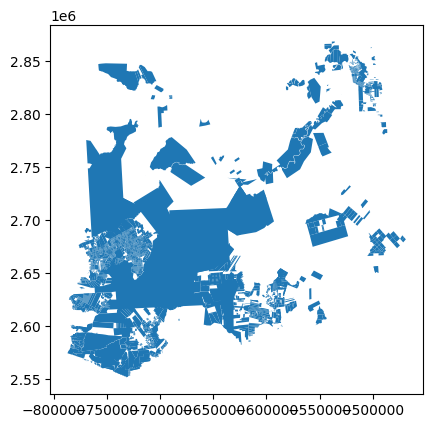

In [ ]:
valid_im.plot()

In [ ]:
imoveis_diss = valid_im.dissolve('NOM_MUNICI')
imoveis_diss

,geometry,COD_IMOVEL,NUM_AREA,COD_ESTADO,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha
NOM_MUNICI,,,,,,,,,
LÃ¡brea,"MULTIPOLYGON (((-771164.192 2568307.404, -7711...",AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90


<Axes: >

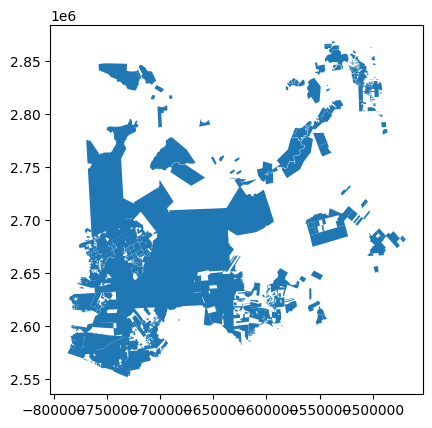

In [ ]:
imoveis_diss.plot()

In [ ]:
ti_im = ti.overlay(imoveis_diss, how='intersection')

In [ ]:
ti.columns

Index(['gid', 'terrai_cod', 'terrai_nom', 'etnia_nome', 'municipio_',
       'uf_sigla', 'superficie', 'fase_ti', 'modalidade', 'reestudo_t', 'cr',
       'faixa_fron', 'undadm_cod', 'undadm_nom', 'undadm_sig', 'TIPO',
       'geometry', 'area_calc_ti_ha'],
      dtype='object')

In [ ]:
imoveis_diss.columns

Index(['geometry', 'COD_IMOVEL', 'NUM_AREA', 'COD_ESTADO', 'NUM_MODULO',
       'TIPO_IMOVE', 'SITUACAO', 'CONDICAO_I', 'area_calc_IM_ha'],
      dtype='object')

<Axes: >

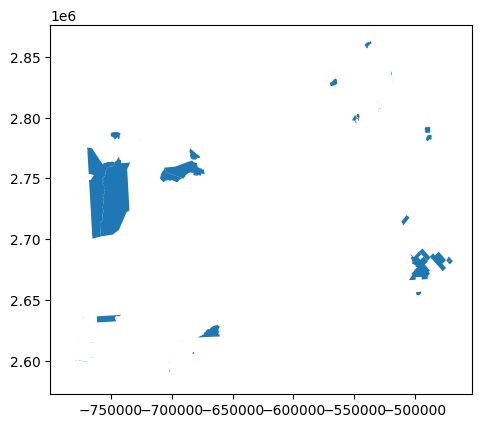

In [ ]:
ti_im.plot()

In [ ]:
ti_im['area_inter_ha'] = ti_im['geometry'].area*0.0001

In [ ]:
ti_im['perc_intersec_ti']=ti_im['area_inter_ha']/ti_im['area_calc_ti_ha']*100
ti_im

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,TIPO,area_calc_ti_ha,COD_IMOVEL,NUM_AREA,COD_ESTADO,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,geometry,area_inter_ha,perc_intersec_ti
0,2,201,Acimã,Apurinã,Lábrea,AM,40686.03,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,40622.14,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"POLYGON ((-676438.816 2767510.894, -676455.106...",4279.59,10.54
1,17,1301,Alto Sepatini,Apurinã,Lábrea,AM,26095.70,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,26078.61,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"MULTIPOLYGON (((-678802.994 2759712.919, -6787...",25796.27,98.92
2,24,2901,Apurinã Km 124 BR-317,Apurinã,"Boca do Acre,Lábrea",AM,42197.61,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,42288.84,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"MULTIPOLYGON (((-763306.398 2614634.652, -7632...",248.22,0.59
3,1297,13801,Guajahã,Apurinã,Pauini,AM,5036.84,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,5029.87,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"POLYGON ((-742932.144 2787347.074, -742148.533...",3472.71,69.04
4,1723,65901,Jacareúba/Katauixi (restrição uso),Isolados,"Canutama,Lábrea",AM,647386.00,Em Estudo,Interditada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Sim,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,608865.20,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"MULTIPOLYGON (((-469910.128 2680584.129, -4712...",45081.85,7.40
5,1347,19001,Jarawara/Jamamadi/Kanamati,"Yaminawa,Jamamadí,Kanamarí","Tapauá,Lábrea",AM,390233.05,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,388960.68,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"POLYGON ((-539391.226 2861699.636, -539285.767...",1502.93,0.39
6,1377,22001,Kaxarari,Kaxarari,"Lábrea,Porto Velho","AM,RO",145889.98,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL ALTO PURUS,Sim,30202001845.00,COORDENACAO REGIONAL ALTO PURUS,CR-ALPR,TI,146293.01,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"MULTIPOLYGON (((-661820.938 2628993.935, -6617...",10152.25,6.94
7,1498,34402,Paumari do Lago Marahã,Apurinã,Lábrea,AM,118766.89,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,118683.77,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"MULTIPOLYGON (((-545425.276 2800284.746, -5454...",4293.04,3.62
8,1501,34701,Peneri/Tacaquiri,Apurinã,Pauini,AM,189870.96,Regularizada,Tradicionalmente ocupada,NaN,COORDENACAO REGIONAL MÉDIO PURUS,Não,30202001878.00,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPR,TI,189809.27,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...",57.90,"POLYGON ((-761351.560 2768261.674, -756945.274...",75810.93,39.94
9,1583,42801,Seruini/Mariene,Apurinã,"Lábrea,Pauini",AM,144971.37,Regularizada,Tradicionalmente ocupada,NaN,COORDE

In [ ]:
ti_im.to_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs/imoveis-nas-tis.csv')